In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv(r"C:\Users\ruben\Downloads\taxi_trip_pricing.csv")
df.columns = df.columns.str.lower()
df = df[df['trip_price'].between(31.430750, 67.476650)]
df.head()

,trip_distance_km,time_of_day,day_of_week,passenger_count,traffic_conditions,weather,base_fare,per_km_rate,per_minute_rate,trip_duration_minutes,trip_price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
13,11.40,Morning,Weekday,3.0,NaN,Clear,4.12,NaN,0.15,84.12,36.1180


In [18]:
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode().iloc[0])
    
df.isna().sum()

trip_distance_km         0
time_of_day              0
day_of_week              0
passenger_count          0
traffic_conditions       0
weather                  0
base_fare                0
per_km_rate              0
per_minute_rate          0
trip_duration_minutes    0
trip_price               0
dtype: int64

In [19]:
df = pd.get_dummies(df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   trip_distance_km           500 non-null    float64
 1   passenger_count            500 non-null    float64
 2   base_fare                  500 non-null    float64
 3   per_km_rate                500 non-null    float64
 4   per_minute_rate            500 non-null    float64
 5   trip_duration_minutes      500 non-null    float64
 6   trip_price                 500 non-null    float64
 7   time_of_day_Evening        500 non-null    bool   
 8   time_of_day_Morning        500 non-null    bool   
 9   time_of_day_Night          500 non-null    bool   
 10  day_of_week_Weekend        500 non-null    bool   
 11  traffic_conditions_Low     500 non-null    bool   
 12  traffic_conditions_Medium  500 non-null    bool   
 13  weather_Rain               500 non-null    bool   
 14 

In [28]:
interactions = {}
X = df.drop('trip_price', axis=1)
y = df['trip_price']

for (col1, col2) in combinations(X.columns, 2):
    interaction = X[col1] * X[col2]
    correlation = abs(pd.concat([interaction, y], axis=1).corr().iloc[0,1])
    interactions[f"{col1} * {col2}"] = correlation

filtered_interactions = {k: v for k, v in interactions.items() if v > 0.3}
filtered_interactions

{'trip_distance_km * base_fare': 0.33741448779960403,
 'trip_distance_km * per_km_rate': 0.5332700159315151,
 'trip_distance_km * per_minute_rate': 0.40576943296979767,
 'trip_distance_km * trip_duration_minutes': 0.34828763818974406}

In [33]:
X['X1'] = df['trip_distance_km'] * df['base_fare']
X['X1'] = df['trip_distance_km'] * df['per_km_rate']
X['X1'] = df['trip_distance_km'] * df['per_minute_rate']

In [36]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the linear regression model
lin_reg = LinearRegression().fit(X_train, y_train)

# Calculate mean squared error
mse = mean_squared_error(y_test, lin_reg.predict(X_test))
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 42.253103462352485


Mean Squared Error: 40.814626548048125


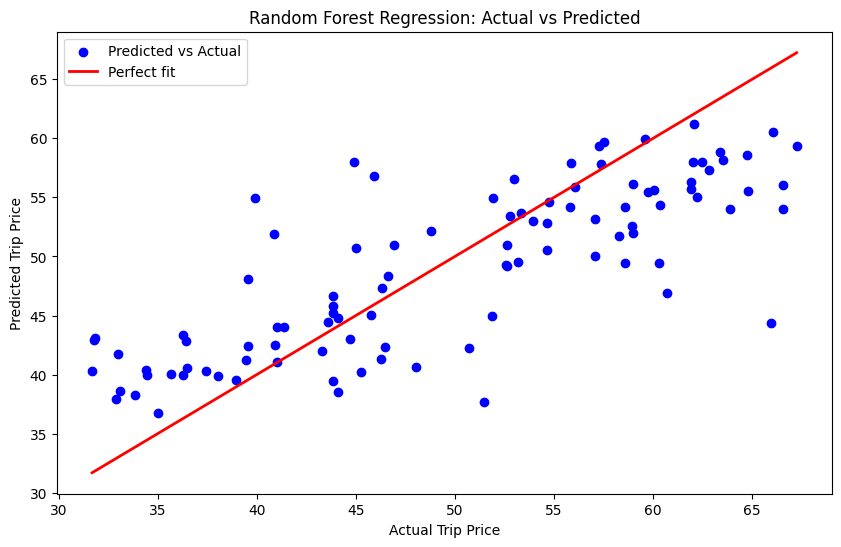

In [38]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (optional for Random Forest, but ensures consistency in pipeline)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Calculate mean squared error
mse = mean_squared_error(y_test, rf_regressor.predict(X_test))
print(f"Mean Squared Error: {mse}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_regressor.predict(X_test), color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect fit')
plt.xlabel('Actual Trip Price')
plt.ylabel('Predicted Trip Price')
plt.title('Random Forest Regression: Actual vs Predicted')  # Title updated for Random Forest
plt.legend()
plt.show()


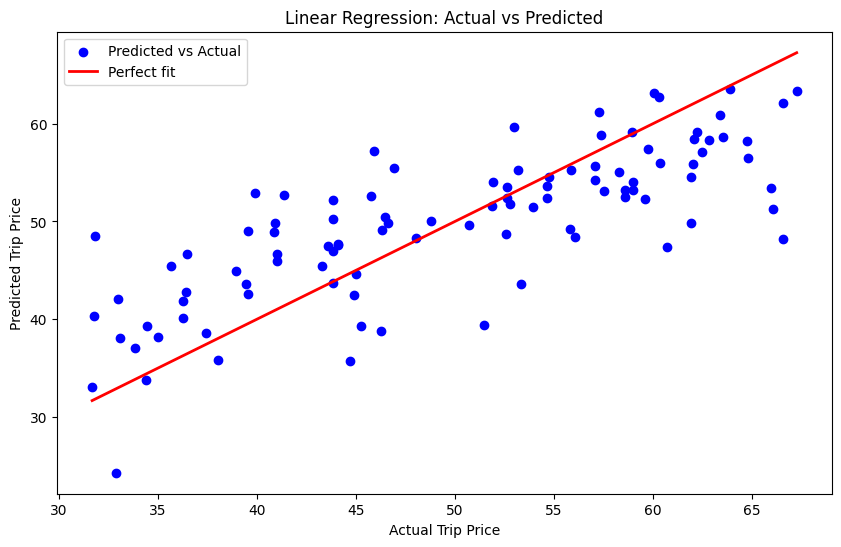

In [37]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lin_reg.predict(X_test), color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect fit')
plt.xlabel('Actual Trip Price')
plt.ylabel('Predicted Trip Price')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()